<a href="https://colab.research.google.com/github/Richish/deep_learning_with_python/blob/master/Weight_regularization_in_imdb_positive_negative_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
num_epochs=20
batch_size=128
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10_000)
#10000 will keep only list of 10000 most frequently used words, rare words will be discarded
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(train_labels[0])

1


In [ ]:
max([max(sequence) for sequence in train_data])
import numpy as np
np.max([np.median(sequence) for sequence in train_data])

1986.5

In [ ]:
# decoding reviews to weords
word_index=imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
# i-3 because indeces 0-2 are reserved for padding, start of sequence and "unknown"
print(decoded_review)

? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br


In [ ]:
# convert data (list of sequence of integers) to numpy matrices of shape (len(sequences), 10_000)
# each list is converted to a vector of length 10,000
# here each word(integer) will be 1 if presnt and 0 if not present in a particular secuence
import numpy as np

def vectorize_sequences(sequences, dimension=10_000):
  results=np.zeros((len(sequences), dimension)) #numpy matrix of shape- (len(sequences), 10_000)
  # assigning 1s to each sequence where words are present in that sequence
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1 # if the 3rd sequence is [3456, 879, 23]; then eqn will be results[3, [3456, 879, 23]] = 1
  return results

x_train=vectorize_sequences(train_data, 10_000)
x_test=vectorize_sequences(test_data, 10_000)

print(x_train.shape)
print(x_test.shape)



(25000, 10000)
(25000, 10000)


In [ ]:
# vectorizing the labels to vector of shape- (len(sequences), )
print(train_labels, train_labels.shape, type(train_labels))
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')
print(y_train, y_train.shape, type(y_train))

[1 0 0 ... 0 1 0] (25000,) <class 'numpy.ndarray'>
[1. 0. 0. ... 0. 1. 0.] (25000,) <class 'numpy.ndarray'>


#  model definition

In [ ]:
# model definition
from keras import models, layers

model=models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10_000, )))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation="sigmoid"))


# Compiling the model

# crossentropy is the preferred choice of loss function whenever the outputs are probabilities.
# crossentropy measures distance in probabbility distributions, in this case, the distance between ground truth distributions and our predictions.


In [ ]:
# crossentropy is the preferred choice of loss function whenever the outputs are probabilities.
# crossentropy measures distance in probabbility distributions, in this case, the distance between ground truth distributions and our predictions.
# we will also monitor accuracy during training
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

# here instead of optimizer string- pointing to optmizioer packaged with keras, we could have passed our custom optimizer class as well.
# for custom loss and metrics we can pass functions

# Cross Validation Set Creation


In [ ]:
# set 10 k samples aside as cross validation set
x_val=x_train[:10_000]
partial_x_train=x_train[10_000:]

y_val=y_train[:10_000]
partial_y_train=y_train[10_000:]

# Training the model

In [ ]:
# train the model using 20 epochs(the whole data will be passed over 20 times)
# using minibatch size of 512-> each time 512 sample will be sent across the model.
# also provide validatiom set as input.
# there is a pause at end of each epoch as it calculates accuracy and loss
# history object is crteated at the end of it.
# history object has a member history- which is a dictionary that has all the data about what happened during training using hidtorical data.

#history=model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))
#this resulted in overfitting. Trying with fewer epochs
history=model.fit(x=partial_x_train, y=partial_y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 261us/step - loss: 0.3965 - acc: 0.8443 - val_loss: 0.3081 - val_acc: 0.8710
Epoch 2/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.2105 - acc: 0.9213 - val_loss: 0.2734 - val_acc: 0.8915
Epoch 3/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1552 - acc: 0.9434 - val_loss: 0.3198 - val_acc: 0.8793
Epoch 4/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1216 - acc: 0.9559 - val_loss: 0.3266 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0952 - acc: 0.9662 - val_loss: 0.3643 - val_acc: 0.8782
Epoch 6/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.0766 - acc: 0.9727 - val_loss: 0.4208 - val_acc: 0.8724
Epoch 7/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.0617 - acc: 0.9794 - val_loss: 0.4559 - 

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# Plot loss and accuracy values during training



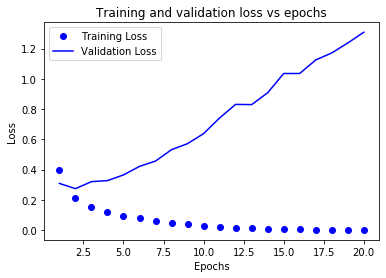

In [ ]:
#plotting loss values
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1, len(loss_values)+1)
epochs

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title("Training and validation loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

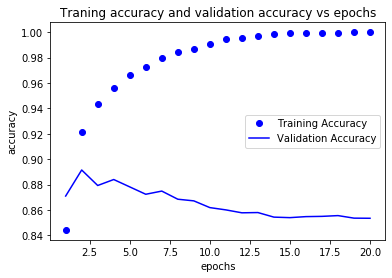

In [ ]:
# plotting accuracy values
plt.clf() #clears the figure
accuracy_values=history_dict["acc"]
val_accuracy_values=history_dict["val_acc"]

plt.plot(epochs, accuracy_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation Accuracy")

plt.title("Traning accuracy and validation accuracy vs epochs")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Gettings results on test data


In [ ]:
results=model.evaluate(x=x_test, y=y_test)
results

25000/25000 [==============================] - 3s 100us/step


[1.4550463374257088, 0.83444]

# Predict on test data


In [ ]:
predicted_results=model.predict(x=x_test)


In [ ]:
predicted_results

array([[2.0253658e-04],
       [1.0000000e+00],
       [9.9982494e-01],
       ...,
       [1.1295080e-05],
       [5.7671440e-01],
       [7.8289062e-02]], dtype=float32)

# Using weight regularization


In [ ]:
from keras import regularizers
def build_model(l1=0.001, l2=0.001):
  layer1=layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=l1,l2=l2), input_shape=(10_000,))
  layer2=layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=l1,l2=l2))
  layer3=layers.Dense(units=1, activation="sigmoid")
  model=models.Sequential(layers=[layer1,layer2,layer3])
  model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
model=build_model()
history_reg=model.fit(x=partial_x_train, y=partial_y_train, batch_size=batch_size, epochs=num_epochs, verbose=0, validation_data=(x_val, y_val))

print(history_reg.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


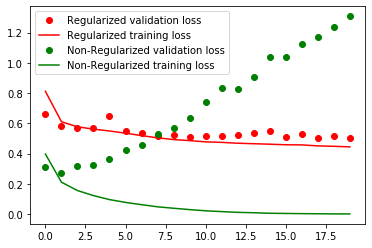

In [ ]:
plt.clf()
plt.plot(range(num_epochs), history_reg.history["val_loss"], 'ro', label="Regularized validation loss")

plt.plot(range(num_epochs), history_reg.history["loss"], 'r', label="Regularized training loss")

plt.plot(range(num_epochs), history.history["val_loss"], 'go', label="Non-Regularized validation loss")
plt.plot(range(num_epochs), history.history["loss"], 'g', label="Non-Regularized training loss")
plt.legend()
plt.show()

# Using Dropout


setting to 0, random outputs of a layer(x fraction of them). But multiplying other outputs by that same fraction.
That is if 1/3rd of outputs are set to zero. The other outputs are multiplied by 3.

In [ ]:
# dropout for alayer is achieved by adding a dropout layer after that particular layer.
def build_model_with_dropout(dropout_fraction=0.5):
  layer1=layers.Dense(units=16, activation="relu", input_shape=(10_000,))
  layer1_dropout=layers.Dropout(rate=dropout_fraction)
  layer2=layers.Dense(units=16, activation="relu")
  layer2_dropout=layers.Dropout(rate=dropout_fraction)
  layer3=layers.Dense(units=1, activation="sigmoid")
  model=models.Sequential(layers=[layer1,layer1_dropout,layer2,layer1_dropout,layer3])
  model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
model=build_model_with_dropout()
history_dropout=model.fit(x=partial_x_train, y=partial_y_train, batch_size=batch_size, epochs=num_epochs, verbose=0, validation_data=(x_val, y_val))

print(history_dropout.history.keys())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


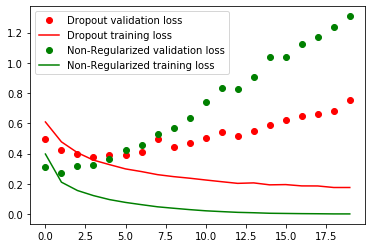

In [ ]:
plt.clf()
plt.plot(range(num_epochs), history_dropout.history["val_loss"], 'ro', label="Dropout validation loss")

plt.plot(range(num_epochs), history_dropout.history["loss"], 'r', label="Dropout training loss")

plt.plot(range(num_epochs), history.history["val_loss"], 'go', label="Non-Regularized validation loss")
plt.plot(range(num_epochs), history.history["loss"], 'g', label="Non-Regularized training loss")
plt.legend()
plt.show()